# Imports

In [1]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import nn
import numpy as np
from functools import partial
import matplotlib.pyplot as plt 
import time

In [2]:
from api.gaussian_functions import (gaussian_data_sampling_mu, 
                                 gaussian_data_sampling_nu,
                                 nu_sampler_from_discrete_distr)

from api.constants import (f_net_default, u_net_default, v_vec_default,
                           centers_nu_default, cov_matrix_default,
                           c_cost_type_default, d_cost_type_default,
                           reg_modes_arr, batch_size_val_default,
                           reg_mode_default, eps_default,
                           epochs_default, batch_size_default, 
                           dtype_default, device_default,
                           random_state_default, random_states_train_default,
                           mu_sampler_default, data_nu_val_default, 
                           optimizer_mode_default, lr_default, 
                           centers_nu_default)

from api.gaussian_functions import index_sampler

from api.neural_ot import Neural_OT
from api.neural_ot_continious_to_discrete import Neural_OT_continious_to_discrete

# Parameters

In [33]:
torch.manual_seed(random_state_default)
D_in = 2
D_out = 1
H = 128
my_u_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 2*H),
    torch.nn.ReLU(),
    torch.nn.Linear(2*H, 4*H),
    torch.nn.ReLU(),
    torch.nn.Linear(4*H, 2*H),
    torch.nn.ReLU(),
    torch.nn.Linear(2*H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 1),
)


f_D_out = D_in

my_f_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, 2*H),
    torch.nn.ReLU(),
    torch.nn.Linear(2*H, 4*H),
    torch.nn.ReLU(),
    torch.nn.Linear(4*H, 2*H),
    torch.nn.ReLU(),
    torch.nn.Linear(2*H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, f_D_out),
)

batch_size_val = 5000
nu_data = gaussian_data_sampling_nu(centers_nu_default, 
                                                     cov_matrix_default, 
                                                     batch_size_val, 
                                                     random_state_default, 
                                                     device = device_default)

my_v_vec = torch.zeros(batch_size_val, 
                                   dtype = dtype_default)

my_eps = 1e-3
my_reg_mode = 'l2'

# Testing

In [34]:
default_experiment = Neural_OT_continious_to_discrete(eps = my_eps, reg_mode = my_reg_mode)

In [35]:
default_experiment.replace_u(my_u_net)
default_experiment.replace_v(my_v_vec)

dual_loss_arr_batch = []
dual_loss_arr_val = []

lr = 1e-4
optimizer_mode = 'Adam'

epochs = 1000
random_states_train = range(epochs)

batch_size = 1024

default_experiment.stochastic_OT_computation(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             optimizer_mode = optimizer_mode,
                                             random_states_train = random_states_train,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = nu_data,
                                             loss_arr_batch = dual_loss_arr_batch,
                                             loss_arr_val = dual_loss_arr_val)

------------------------------
Epoch_num = 1
Consumed time = 0.003019571304321289 seconds
Loss estimation on sampled data = 0.015049910394736798
Loss estimation on validation data = 0.019730778469186413
------------------------------
Epoch_num = 51
Consumed time = 0.002586841583251953 seconds
Loss estimation on sampled data = 0.7520277795265429
Loss estimation on validation data = 0.8073206354667622
------------------------------
Epoch_num = 101
Consumed time = 0.002565622329711914 seconds
Loss estimation on sampled data = 2.1714202862599716
Loss estimation on validation data = 2.1409582038479003
------------------------------
Epoch_num = 151
Consumed time = 0.0027675628662109375 seconds
Loss estimation on sampled data = 2.136658696281036
Loss estimation on validation data = 2.1562182597700783
------------------------------
Epoch_num = 201
Consumed time = 0.003033876419067383 seconds
Loss estimation on sampled data = 2.0962889224463024
Loss estimation on validation data = 2.16309796358

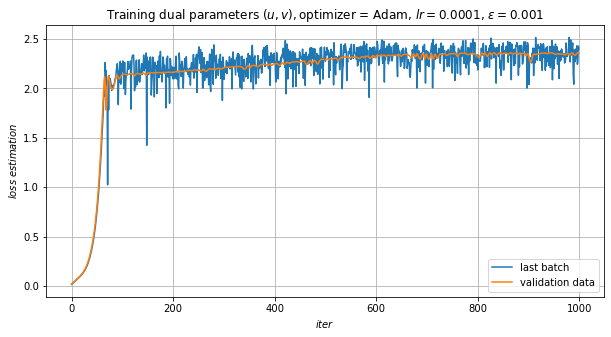

In [36]:
plot_mode = 'dual'

default_experiment.plot_loss_graphs(loss_arr_batch = dual_loss_arr_batch, 
                                    loss_arr_val = dual_loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

In [37]:
default_experiment.replace_f(my_f_net)

loss_arr_batch = []
loss_arr_val = []

lr = 1e-4
optimizer_mode = 'Adam'

epochs = 1701
random_states_train = range(epochs)
random_state_val = random_state_default

batch_size = 1024

default_experiment.optimal_map_learning(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             optimizer_mode = optimizer_mode,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = data_nu_val_default,
                                             random_states_train = random_states_train,
                                             random_state_val = random_state_val,
                                             loss_arr_batch = loss_arr_batch,
                                             loss_arr_val = loss_arr_val)

------------------------------
Epoch_num = 1
Consumed time = 0.004974842071533203 seconds
Loss estimation on sampled data = 1.1748183525039924
Loss estimation on validation data = 1.1723388863179585
------------------------------
Epoch_num = 51
Consumed time = 0.003343820571899414 seconds
Loss estimation on sampled data = 3.9607400422216057
Loss estimation on validation data = 3.947062465733439
------------------------------
Epoch_num = 101
Consumed time = 0.003052949905395508 seconds
Loss estimation on sampled data = 1.0838376456534238
Loss estimation on validation data = 1.0615397216824918
------------------------------
Epoch_num = 151
Consumed time = 0.002996206283569336 seconds
Loss estimation on sampled data = 0.9076154315449929
Loss estimation on validation data = 0.8661985221200142
------------------------------
Epoch_num = 201
Consumed time = 0.002959012985229492 seconds
Loss estimation on sampled data = 0.7830458393733681
Loss estimation on validation data = 0.750650321054193


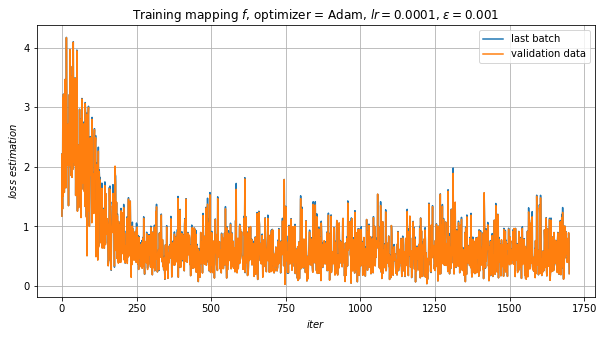

In [38]:
plot_mode = 'mapping training'

default_experiment.plot_loss_graphs(loss_arr_batch = loss_arr_batch, 
                                    loss_arr_val = loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

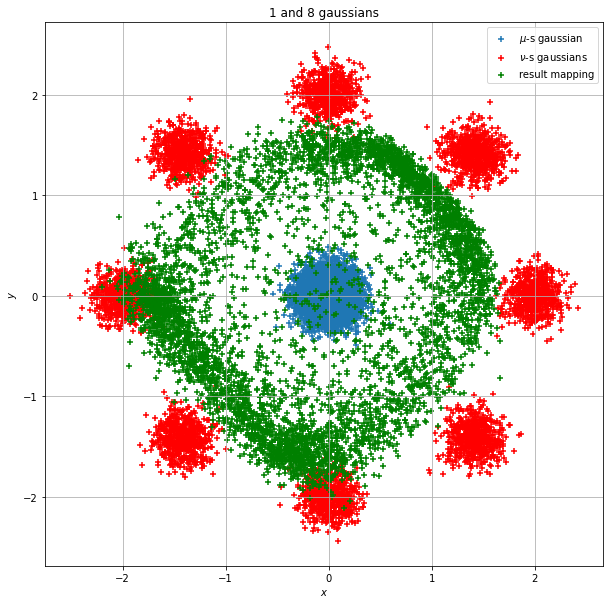

In [39]:
random_state = random_state_default

default_experiment.plot_2d_mapping(mu_sampler = mu_sampler_default, 
                                   data_nu_val = nu_data,
                                   random_state = random_state)

In [40]:
default_experiment.replace_f(my_f_net)

algo_2_loss_arr_batch = []
algo_2_loss_arr_val = []

lr = 1e-2
optimizer_mode = 'Algo 2'

epochs = 1000
shift = 1000
random_states_train = range(shift, shift + epochs)
random_state_val = random_state_default

batch_size = 1024

default_experiment.optimal_map_learning_algo_2(lr = lr, epochs = epochs,
                                             batch_size = batch_size,
                                             mu_sampler = mu_sampler_default, 
                                             index_sampler = index_sampler,
                                             nu_data = data_nu_val_default,
                                             random_states_train = random_states_train,
                                             random_state_val = random_state_val,
                                             loss_arr_batch = algo_2_loss_arr_batch,
                                             loss_arr_val = algo_2_loss_arr_val)

------------------------------
Epoch_num = 1
Consumed time = 0.0032622814178466797 seconds
Loss estimation on sampled data = 2.4002214062387726
Loss estimation on validation data = 2.010945106699002
------------------------------
Epoch_num = 51
Consumed time = 0.0023446083068847656 seconds
Loss estimation on sampled data = 2.5286262846289236
Loss estimation on validation data = 2.0067560756650806
------------------------------
Epoch_num = 101
Consumed time = 0.0026268959045410156 seconds
Loss estimation on sampled data = 1.7886030472703125
Loss estimation on validation data = 1.9711507394600416
------------------------------
Epoch_num = 151
Consumed time = 0.0024971961975097656 seconds
Loss estimation on sampled data = 1.2154201327918557
Loss estimation on validation data = 1.9804293666108728
------------------------------
Epoch_num = 201
Consumed time = 0.0027146339416503906 seconds
Loss estimation on sampled data = 1.917809933400294
Loss estimation on validation data = 2.016881853784

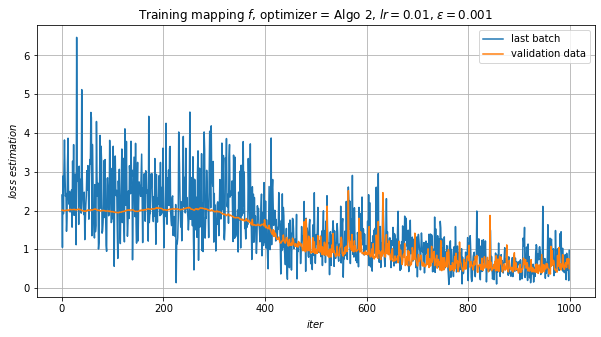

In [41]:
plot_mode = 'mapping training'

default_experiment.plot_loss_graphs(loss_arr_batch = algo_2_loss_arr_batch, 
                                    loss_arr_val = algo_2_loss_arr_val, 
                                    optimizer_mode = optimizer_mode, 
                                    plot_mode = plot_mode,
                                    lr = lr)

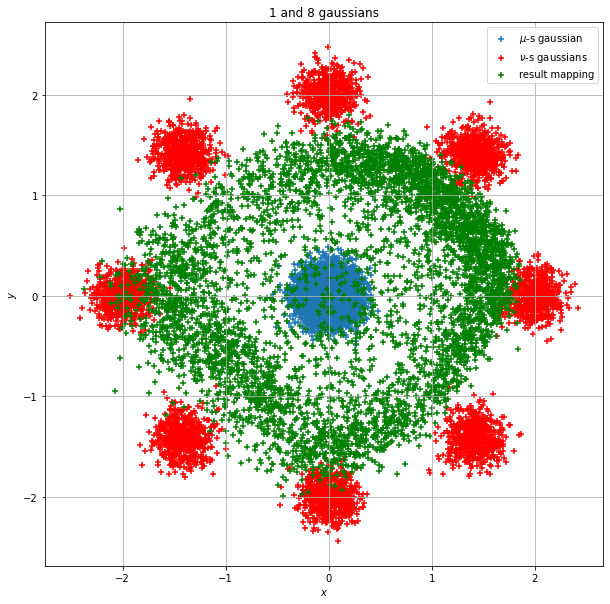

In [42]:
random_state = random_state_default

default_experiment.plot_2d_mapping(mu_sampler = mu_sampler_default, 
                                   data_nu_val = nu_data,
                                   random_state = random_state)